In [1]:
# joint learning model

# Inludes all features

# dropped gridID

# Windspeed < 0 REMOVED

# Data does have NaN values --> Impute the data : sklearn multivariate imputer (Iterative Imputer)
# Replace with 0 for now


In [2]:
import pandas as pd
import numpy as np

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# data.describe()

# imputer = IterativeImputer(max_iter = 10, random_state = 0)
# data = pd.concat([data['stormid'],imputer.fit(data.iloc[:,1:])])

# test = imputer.fit(test.iloc[:,1:])
data.head()

# data = data.fillna(0)
# test = test.fillna(0)


,stormid,instant_t,latitude,longitude,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,...,vo700_10_1,vo700_10_2,vo700_10_3,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10
0,1979067S16064,0,-16.0,64.0,20.0,0,3.181609e-21,20.0,0.0,6,...,-0.000004,-0.000007,-0.000010,-0.000013,-0.000016,-0.000018,-1.520000e-05,-0.000008,-0.000003,0.000005
1,1979067S16064,1,-15.9,65.1,0.0,0,3.181609e-21,20.0,-20.0,6,...,-0.000011,-0.000015,-0.000019,-0.000023,-0.000022,-0.000017,-1.050000e-05,-0.000004,0.000004,0.000011
2,1979067S16064,2,-16.1,66.2,0.0,0,3.181609e-21,20.0,-20.0,6,...,-0.000010,-0.000018,-0.000023,-0.000019,-0.000012,-0.000006,-1.000000e-06,0.000005,0.000011,0.000016
3,1979067S16064,3,-17.0,67.0,0.0,0,3.181609e-21,20.0,0.0,6,...,-0.000024,-0.000040,-0.000040,-0.000033,-0.000019,-0.000006,1.500000e-06,0.000009,0.000014,0.000019
4,1979067S16064,4,-18.0,67.5,28.0,0,3.181609e-21,20.0,28.0,6,...,-0.000020,-0.000037,-0.000043,-0.000035,-0.000024,-0.000011,-1.000000e-07,0.000007,0.000014,0.000017


In [3]:
# # data.iloc[:,1:]
# stormid_data = data['stormid']
# stormid_data

In [4]:
data = data.fillna(0)
test = test.fillna(0)

In [5]:
features = data.columns.values.tolist()

# data = data.loc[:, data.columns.intersection(features)]

# data.rename(columns={"stormid":"unique-key", "latitude":"Lat", "longitude":"Long", "windspeed":"WindSpeed", "Minimum Pressure":"min_pressure", "Low Wind NE":"34kt_ne","Low Wind SE":"34kt_se","Low Wind SW":"34kt_sw", "Low Wind NW":"34kt_nw", "Moderate Wind NE":"50kt_ne","Moderate Wind SE":"50kt_se", "Moderate Wind SW":"50kt_sw", "Moderate Wind NW":"50kt_nw","High Wind NE":"64kt_ne","High Wind SE":"64kt_ne","High Wind SW":"64kt_sw","High Wind NW":"64kt_se"}, inplace=True)
# data.head()

# test = test.loc[:, test.columns.intersection(['stormid','latitude','longitude','windspeed'])]

# test = test.loc[:, test.columns.intersection(features)]

# test.rename(columns={"stormid":"unique-key", "latitude":"Lat", "longitude":"Long", "windspeed":"WindSpeed", "Minimum Pressure":"min_pressure", "Low Wind NE":"34kt_ne","Low Wind SE":"34kt_se","Low Wind SW":"34kt_sw", "Low Wind NW":"34kt_nw", "Moderate Wind NE":"50kt_ne","Moderate Wind SE":"50kt_se", "Moderate Wind SW":"50kt_sw", "Moderate Wind NW":"50kt_nw","High Wind NE":"64kt_ne","High Wind SE":"64kt_ne","High Wind SW":"64kt_sw","High Wind NW":"64kt_se"}, inplace=True)

# data.describe()
import numpy as np
np.where(data.isna())


(array([], dtype=int64), array([], dtype=int64))

In [6]:
# # Remove hurricanes where windspeed = 0
data = data[data['windspeed'] != 0]


test = test[test['windspeed'] != 0]

data.head()


,stormid,instant_t,latitude,longitude,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,...,vo700_10_1,vo700_10_2,vo700_10_3,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10
0,1979067S16064,0,-16.0,64.0,20.0,0,3.181609e-21,20.0,0.0,6,...,-0.000004,-0.000007,-0.000010,-0.000013,-0.000016,-0.000018,-1.520000e-05,-0.000008,-0.000003,0.000005
4,1979067S16064,4,-18.0,67.5,28.0,0,3.181609e-21,20.0,28.0,6,...,-0.000020,-0.000037,-0.000043,-0.000035,-0.000024,-0.000011,-1.000000e-07,0.000007,0.000014,0.000017
8,1979067S16064,8,-20.6,66.9,28.0,0,3.181609e-21,20.0,28.0,6,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
17,1979077N07150,8,11.7,138.7,35.0,1,2.989996e-22,0.0,35.0,2,...,-0.000010,-0.000015,-0.000006,0.000010,-0.000011,-0.000026,-2.350000e-05,-0.000021,-0.000019,-0.000014
18,1979077N07150,9,12.2,137.8,35.0,1,2.989996e-22,0.0,35.0,2,...,-0.000017,-0.000007,0.000020,0.000022,-0.000008,-0.000019,-1.970000e-05,-0.000023,-0.000023,-0.000019


In [7]:
# Since our keys are strings, we enumerate them to access them as integers 
keys = list(enumerate(pd.unique(data['stormid'])))

y = np.zeros((1481))
for x in range(0,1481):
    y[x] = len(pd.DataFrame(data[data['stormid'] == keys[x][1]], columns = data.keys()).reset_index(drop = True))

# Now contains how many time instances of data (or rows) each hurricane contains 
hurricane_amount = pd.DataFrame(y)

keys1 = list(enumerate(pd.unique(test['stormid'])))

y = np.zeros((739))
for x in range(0,739):
    y[x] = len(pd.DataFrame(test[test['stormid'] == keys1[x][1]], columns = test.keys()).reset_index(drop = True))

# Now contains how many time instances of data (or rows) each hurricane contains 
hurricane_amount_test = pd.DataFrame(y)

In [8]:
print(len(keys))

1481


In [9]:
# Total amount of hurricanes we have in our dataset 
print(len(pd.unique(data['stormid'])))

1481


In [10]:
print(len(pd.unique(test['stormid'])))

739


In [11]:
# Provides statistical information about the DataFrame 
# From here we can see that the shortest hurricane only has 4 rows of information and the largest hurricane has 94 rows

hurricane_amount.describe()

,0
count,1481.000000
mean,26.520594
std,15.190627
min,1.000000
25%,16.000000
50%,24.000000
75%,35.000000
max,121.000000


In [12]:
hurricane_amount_test.describe()

,0
count,739.000000
mean,26.626522
std,14.982326
min,2.000000
25%,15.000000
50%,24.000000
75%,35.000000
max,106.000000


In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

# Print the hurricane key with the amount of data they contain
# print ('Top 6 Hurricanes (in terms of data quantity)')
# for x in hurricane_amount.nlargest(6, 0).index:
#     print (keys[x][1], "-", hurricane_amount.loc[x][0])

# # Print the distribution of data quantity for all 174 hurricanes
# hurricane_amount.plot.hist(bins=20)
# plt.show()

In [14]:
data.describe()

,instant_t,latitude,longitude,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,nature,...,vo700_10_1,vo700_10_2,vo700_10_3,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10
count,39277.000000,39277.000000,39277.000000,39277.000000,39277.000000,3.927700e+04,39277.000000,39277.000000,39277.000000,39277.000000,...,39277.000000,39277.000000,39277.000000,39277.000000,39277.000000,39277.000000,39277.000000,39277.000000,39277.000000,39277.000000
mean,18.675052,10.461991,10.358794,49.187642,0.728620,2.564589e-01,18.811798,1.224737,2.810754,1.067342,...,-0.000007,-0.000008,-0.000007,-0.000007,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006
std,14.458299,19.187030,110.539733,24.089913,0.444677,3.499839e-01,12.171096,10.715023,2.034509,1.915551,...,0.000019,0.000019,0.000020,0.000021,0.000021,0.000022,0.000022,0.000022,0.000022,0.000022
min,0.000000,-61.300000,-179.900000,-1.000000,0.000000,3.326528e-45,-1.000000,-130.000000,0.000000,0.000000,...,-0.000139,-0.000229,-0.000208,-0.000255,-0.000355,-0.000356,-0.000286,-0.000179,-0.000141,-0.000187
25%,8.000000,-9.900000,-101.800000,30.000000,0.000000,5.892916e-10,0.000000,-5.000000,2.000000,0.000000,...,-0.000019,-0.000019,-0.000019,-0.000018,-0.000018,-0.000018,-0.000018,-0.000019,-0.000019,-0.000020
50%,16.000000,16.000000,41.600000,45.000000,1.000000,2.320007e-02,25.000000,0.000000,3.000000,0.000000,...,-0.000008,-0.000008,-0.000008,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007
75%,26.000000,22.200000,122.200000,65.000000,1.000000,5.104819e-01,25.000000,5.000000,4.000000,2.000000,...,0.000003,0.000002,0.000003,0.000004,0.000004,0.000005,0.000005,0.000005,0.000005,0.000006
max,120.000000,70.700000,180.000000,185.000000,1.000000,1.000000e+00,72.000000,65.000000,6.000000,5.000000,...,0.000174,0.000265,0.000254,0.000228,0.000212,0.000264,0.000195,0.000275,0.000332,0.000317


In [15]:
test.describe()

,instant_t,latitude,longitude,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,nature,...,vo700_10_1,vo700_10_2,vo700_10_3,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10
count,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,1.967700e+04,19677.000000,19677.000000,19677.000000,19677.000000,...,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000
mean,18.768207,10.088531,15.750377,50.118768,0.721147,2.436949e-01,18.525385,1.335163,2.881791,1.028815,...,-0.000008,-0.000008,-0.000007,-0.000007,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006
std,14.167578,19.195786,112.602916,24.329886,0.448447,3.477491e-01,12.736541,11.317132,1.999073,1.909609,...,0.000019,0.000019,0.000020,0.000021,0.000022,0.000023,0.000023,0.000023,0.000023,0.000023
min,0.000000,-57.000000,-179.900000,-2.000000,0.000000,1.008697e-43,-1.000000,-85.000000,0.000000,0.000000,...,-0.000325,-0.000295,-0.000342,-0.000284,-0.000186,-0.000176,-0.000187,-0.000244,-0.000265,-0.000175
25%,8.000000,-10.900000,-102.700000,30.000000,0.000000,3.376876e-10,0.000000,-5.000000,2.000000,0.000000,...,-0.000018,-0.000018,-0.000018,-0.000018,-0.000018,-0.000018,-0.000019,-0.000019,-0.000020,-0.000020
50%,16.000000,15.800000,55.200000,45.000000,1.000000,1.435582e-02,25.000000,0.000000,3.000000,0.000000,...,-0.000007,-0.000008,-0.000007,-0.000007,-0.000007,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006
75%,26.000000,22.300000,125.300000,65.000000,1.000000,4.448581e-01,25.000000,5.000000,4.000000,0.000000,...,0.000002,0.000002,0.000003,0.000004,0.000004,0.000005,0.000005,0.000006,0.000006,0.000007
max,105.000000,68.800000,180.000000,160.000000,1.000000,9.996001e-01,105.000000,95.000000,6.000000,5.000000,...,0.000193,0.000224,0.000212,0.000275,0.000335,0.000309,0.000355,0.000324,0.000231,0.000355


### Data Preprocessing

From the dataset, we have latitude and longitude. It is easier for the neural network to learn from distance vectors since these values do not contain negative values (like latitude and longitude). To preprocess our data, we will calculate the angle of travel and distance between each given point and add that as new columns to our DataFrame. In addition, we will remove the outlier hurricanes, to get a more normal distribution to insert into the neural network.

In [16]:
  from geopy.distance import great_circle as vc
  import math as Math

  y = np.zeros((1481))
  data['distance'] = np.zeros((39277))
  data['direction'] = np.zeros((39277))
  

  # For all hurricanes
  for x in range(0,1481):
      t = pd.DataFrame(data[data['stormid'] == keys[x][1]], columns = data.keys()).reset_index(drop = False)
      dst = 0
      prev = (0,0)

      # For all latitude and longitude points of hurricane, calculate the angle of travel and distance
      for p in zip(t['latitude'], t['longitude']):
          if prev == (0,0):
              prev = p
              continue 
          # Stores the distance into the DataFrame
          data.set_value(t[(t['latitude'] == p[0]) & (t['longitude'] == p[1])]['index'].values[0], 'distance', vc(prev,p).miles)

          dLon = p[1] - prev[1];
          y_x = Math.sin(dLon) * Math.cos(p[0]);
          x_x = Math.cos(p[1]) * Math.sin(p[0]) - Math.sin(p[1]) * Math.cos(p[0]) * Math.cos(dLon);
          brng = Math.degrees(Math.atan2(y_x, x_x)) 
          if (brng < 0):
              brng+= 360;

          # Stores the angle of travel into the DataFrame
          data.set_value(t[(t['latitude'] == p[0]) & (t['longitude'] == p[1])]['index'].values[0], 'direction', brng)
          dst += vc(prev,p).miles
          prev = p
      y[x] = dst

  # Now contains the distance between all given latitude and longitude points
  hurricane_distance = pd.DataFrame(y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [17]:
from geopy.distance import great_circle as vc
import math as Math

y = np.zeros((739))
test['distance'] = np.zeros((19677))
test['direction'] = np.zeros((19677))

# For all hurricanes
for x in range(0,739):
    t = pd.DataFrame(test[test['stormid'] == keys1[x][1]], columns = test.keys()).reset_index(drop = False)
    dst = 0
    prev = (0,0)
    
    # For all latitude and longitude points of hurricane, calculate the angle of travel and distance
    for p in zip(t['latitude'], t['longitude']):
        if prev == (0,0):
            prev = p
            continue 
        # Stores the distance into the DataFrame
        test.set_value(t[(t['latitude'] == p[0]) & (t['longitude'] == p[1])]['index'].values[0], 'distance', vc(prev,p).miles)
        
        dLon = p[1] - prev[1];
        y_x = Math.sin(dLon) * Math.cos(p[0]);
        x_x = Math.cos(p[1]) * Math.sin(p[0]) - Math.sin(p[1]) * Math.cos(p[0]) * Math.cos(dLon);
        brng = Math.degrees(Math.atan2(y_x, x_x)) 
        if (brng < 0):
            brng+= 360;
        
        # Stores the angle of travel into the DataFrame
        test.set_value(t[(t['latitude'] == p[0]) & (t['longitude'] == p[1])]['index'].values[0], 'direction', brng)
        dst += vc(prev,p).miles
        prev = p
    y[x] = dst

# Now contains the distance between all given latitude and longitude points
hurricane_distance1 = pd.DataFrame(y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [18]:
data.describe()

,instant_t,latitude,longitude,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,nature,...,vo700_10_3,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10,distance,direction
count,39277.000000,39277.000000,39277.000000,39277.000000,39277.000000,3.927700e+04,39277.000000,39277.000000,39277.000000,39277.000000,...,39277.000000,39277.000000,39277.000000,39277.000000,39277.000000,39277.000000,39277.000000,39277.000000,39277.000000,39277.000000
mean,18.675052,10.461991,10.358794,49.187642,0.728620,2.564589e-01,18.811798,1.224737,2.810754,1.067342,...,-0.000007,-0.000007,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,66.127833,169.516337
std,14.458299,19.187030,110.539733,24.089913,0.444677,3.499839e-01,12.171096,10.715023,2.034509,1.915551,...,0.000020,0.000021,0.000021,0.000022,0.000022,0.000022,0.000022,0.000022,45.189099,111.848508
min,0.000000,-61.300000,-179.900000,-1.000000,0.000000,3.326528e-45,-1.000000,-130.000000,0.000000,0.000000,...,-0.000208,-0.000255,-0.000355,-0.000356,-0.000286,-0.000179,-0.000141,-0.000187,0.000000,0.000000
25%,8.000000,-9.900000,-101.800000,30.000000,0.000000,5.892916e-10,0.000000,-5.000000,2.000000,0.000000,...,-0.000019,-0.000018,-0.000018,-0.000018,-0.000018,-0.000019,-0.000019,-0.000020,36.878410,66.982964
50%,16.000000,16.000000,41.600000,45.000000,1.000000,2.320007e-02,25.000000,0.000000,3.000000,0.000000,...,-0.000008,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,60.310562,176.085088
75%,26.000000,22.200000,122.200000,65.000000,1.000000,5.104819e-01,25.000000,5.000000,4.000000,2.000000,...,0.000003,0.000004,0.000004,0.000005,0.000005,0.000005,0.000005,0.000006,85.840701,257.102857
max,120.000000,70.700000,180.000000,185.000000,1.000000,1.000000e+00,72.000000,65.000000,6.000000,5.000000,...,0.000254,0.000228,0.000212,0.000264,0.000195,0.000275,0.000332,0.000317,858.154782,359.976631


In [19]:
# Columns have been added
data.head()

,stormid,instant_t,latitude,longitude,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,...,vo700_10_3,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10,distance,direction
0,1979067S16064,0,-16.0,64.0,20.0,0,3.181609e-21,20.0,0.0,6,...,-0.000010,-0.000013,-0.000016,-0.000018,-1.520000e-05,-0.000008,-0.000003,0.000005,0.000000,0.000000
4,1979067S16064,4,-18.0,67.5,28.0,0,3.181609e-21,20.0,28.0,6,...,-0.000043,-0.000035,-0.000024,-0.000011,-1.000000e-07,0.000007,0.000014,0.000017,269.385501,199.586642
8,1979067S16064,8,-20.6,66.9,28.0,0,3.181609e-21,20.0,28.0,6,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,183.853403,12.040534
17,1979077N07150,8,11.7,138.7,35.0,1,2.989996e-22,0.0,35.0,2,...,-0.000006,0.000010,-0.000011,-0.000026,-2.350000e-05,-0.000021,-0.000019,-0.000014,0.000000,0.000000
18,1979077N07150,9,12.2,137.8,35.0,1,2.989996e-22,0.0,35.0,2,...,0.000020,0.000022,-0.000008,-0.000019,-1.970000e-05,-0.000023,-0.000023,-0.000019,69.960854,263.476256


In [20]:
# Here we can see that the hurricane that traveled the least only traveled 65 miles, while the one that traveled the most traveled 8402 miles
hurricane_distance.describe()

,0
count,1481.000000
mean,1758.089945
std,1192.151232
min,0.000000
25%,893.039658
50%,1543.681851
75%,2360.507677
max,8400.528798


In [21]:
test.describe()

,instant_t,latitude,longitude,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,nature,...,vo700_10_3,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10,distance,direction
count,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,1.967700e+04,19677.000000,19677.000000,19677.000000,19677.000000,...,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000
mean,18.768207,10.088531,15.750377,50.118768,0.721147,2.436949e-01,18.525385,1.335163,2.881791,1.028815,...,-0.000007,-0.000007,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,67.116203,169.866945
std,14.167578,19.195786,112.602916,24.329886,0.448447,3.477491e-01,12.736541,11.317132,1.999073,1.909609,...,0.000020,0.000021,0.000022,0.000023,0.000023,0.000023,0.000023,0.000023,44.895729,111.432956
min,0.000000,-57.000000,-179.900000,-2.000000,0.000000,1.008697e-43,-1.000000,-85.000000,0.000000,0.000000,...,-0.000342,-0.000284,-0.000186,-0.000176,-0.000187,-0.000244,-0.000265,-0.000175,0.000000,0.000000
25%,8.000000,-10.900000,-102.700000,30.000000,0.000000,3.376876e-10,0.000000,-5.000000,2.000000,0.000000,...,-0.000018,-0.000018,-0.000018,-0.000018,-0.000019,-0.000019,-0.000020,-0.000020,38.714908,68.680862
50%,16.000000,15.800000,55.200000,45.000000,1.000000,1.435582e-02,25.000000,0.000000,3.000000,0.000000,...,-0.000007,-0.000007,-0.000007,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,61.661497,176.446070
75%,26.000000,22.300000,125.300000,65.000000,1.000000,4.448581e-01,25.000000,5.000000,4.000000,0.000000,...,0.000003,0.000004,0.000004,0.000005,0.000005,0.000006,0.000006,0.000007,86.698117,259.099023
max,105.000000,68.800000,180.000000,160.000000,1.000000,9.996001e-01,105.000000,95.000000,6.000000,5.000000,...,0.000212,0.000275,0.000335,0.000309,0.000355,0.000324,0.000231,0.000355,578.682250,359.962008


In [22]:
test.head()

,stormid,instant_t,latitude,longitude,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,...,vo700_10_3,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10,distance,direction
0,1979066S15124,0,-15.2,123.9,25.0,0,1.596617e-21,25.0,0.0,6,...,-0.000022,-0.000028,-0.000031,-0.000034,-0.000033,-0.000022,-0.000008,-8.000000e-07,0.000000,0.000000
1,1979066S15124,1,-15.1,123.0,25.0,0,1.596617e-21,25.0,0.0,6,...,-0.000010,-0.000014,-0.000023,-0.000027,-0.000025,-0.000020,-0.000018,-1.120000e-05,60.419181,67.028088
2,1979066S15124,2,-14.7,122.3,25.0,0,1.596617e-21,25.0,0.0,6,...,-0.000046,-0.000040,-0.000018,-0.000010,-0.000020,-0.000031,-0.000021,-1.090000e-05,54.298810,20.592665
3,1979066S15124,3,-14.3,122.0,25.0,0,1.596617e-21,25.0,0.0,6,...,-0.000009,-0.000018,-0.000024,-0.000013,-0.000006,-0.000007,-0.000018,-1.590000e-05,34.154624,2.940917
4,1979066S15124,4,-13.8,121.7,25.0,0,1.596617e-21,25.0,0.0,6,...,0.000004,-0.000002,-0.000010,-0.000021,-0.000020,-0.000008,-0.000010,-1.120000e-05,39.972504,346.614445


In [23]:
hurricane_distance1.describe()

,0
count,739.000000
mean,1789.815443
std,1168.424520
min,61.005700
25%,942.989118
50%,1590.397406
75%,2415.948702
max,6914.836785


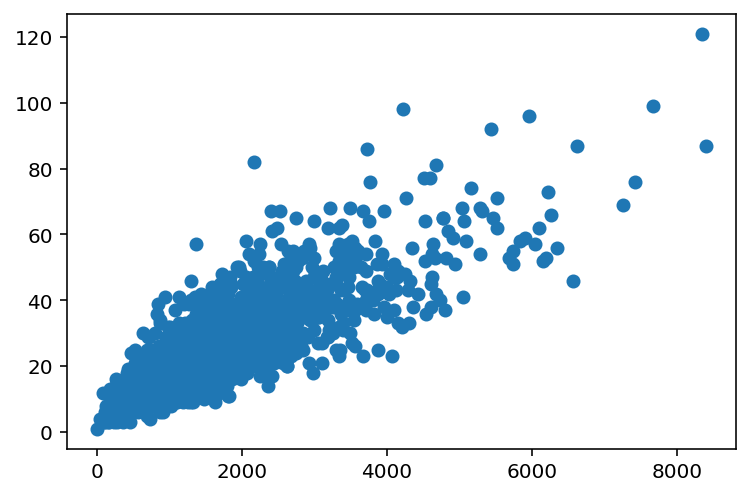

In [24]:
# Print the hurricane key with the amount of data they contain

# print ('Top 6 Hurricanes (in terms of distance traveled)')
# for x in hurricane_distance.nlargest(6, 0).index:
#     print (keys[x][1], "-", hurricane_distance.loc[x][0], "miles -", hurricane_amount.loc[x][0])


# Plotted the amount of hurricane distance traveled vs the amount of data they contain.
corr = plt.scatter(hurricane_distance[0], hurricane_amount[0])
plt.show()

In [25]:
# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
# for x in hurricane_amount.nlargest(3, 0).index:
#     data[data['stormid'] == keys[x][1]].plot(x='latitude', y='longitude') 

In [26]:
# Graph the trajectories of the shortest hurricanes (the ones that traveled the least)
# for x in hurricane_amount.nsmallest(3, 0).index:
#     data[data['stormid'] == keys[x][1]].plot(x='latitude', y='longitude')

In [27]:
# Graph the trajectories of 3 random hurricanes 
# for x in np.random.choice(1481, 3):
#      data[data['stormid'] == keys[x][1]].plot(x='latitude', y='longitude') 

In [28]:
print(data.describe())
data = data[data['distance']!=0]
print(data.describe())

          instant_t      latitude     longitude     windspeed    hemisphere  \
count  39277.000000  39277.000000  39277.000000  39277.000000  39277.000000   
mean      18.675052     10.461991     10.358794     49.187642      0.728620   
std       14.458299     19.187030    110.539733     24.089913      0.444677   
min        0.000000    -61.300000   -179.900000     -1.000000      0.000000   
25%        8.000000     -9.900000   -101.800000     30.000000      0.000000   
50%       16.000000     16.000000     41.600000     45.000000      1.000000   
75%       26.000000     22.200000    122.200000     65.000000      1.000000   
max      120.000000     70.700000    180.000000    185.000000      1.000000   

       Jday_predictor  initial_max_wind  max_wind_change_12h         basin  \
count    3.927700e+04      39277.000000         39277.000000  39277.000000   
mean     2.564589e-01         18.811798             1.224737      2.810754   
std      3.499839e-01         12.171096            10.

In [29]:
print(test.describe())
test = test[test['distance']!=0]
print(test.describe())

          instant_t      latitude     longitude     windspeed    hemisphere  \
count  19677.000000  19677.000000  19677.000000  19677.000000  19677.000000   
mean      18.768207     10.088531     15.750377     50.118768      0.721147   
std       14.167578     19.195786    112.602916     24.329886      0.448447   
min        0.000000    -57.000000   -179.900000     -2.000000      0.000000   
25%        8.000000    -10.900000   -102.700000     30.000000      0.000000   
50%       16.000000     15.800000     55.200000     45.000000      1.000000   
75%       26.000000     22.300000    125.300000     65.000000      1.000000   
max      105.000000     68.800000    180.000000    160.000000      1.000000   

       Jday_predictor  initial_max_wind  max_wind_change_12h         basin  \
count    1.967700e+04      19677.000000         19677.000000  19677.000000   
mean     2.436949e-01         18.525385             1.335163      2.881791   
std      3.477491e-01         12.736541            11.

In [30]:
# We are removing some outliers that contain too little or too much information to keep a more normal distribution.
cond = (hurricane_amount > 13) & (hurricane_amount < 100)
keys25 = []

for x in cond.index:
    if cond.loc[x][0]:
        keys25.append(keys[x][1])

word2keys = {}
for x in keys:
    word2keys[x[1]] = x[0]
    
df = data[data['stormid'].isin(keys25)]

# df = data

df.head()

,stormid,instant_t,latitude,longitude,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,...,vo700_10_3,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10,distance,direction
18,1979077N07150,9,12.2,137.8,35.0,1,2.989996e-22,0.0,35.0,2,...,2.000000e-05,0.000022,-0.000008,-0.000019,-0.000020,-0.000023,-0.000023,-0.000019,69.960854,263.476256
19,1979077N07150,10,12.8,136.7,40.0,1,2.989996e-22,0.0,5.0,2,...,9.000000e-07,0.000010,-0.000005,-0.000020,-0.000025,-0.000024,-0.000024,-0.000022,84.996212,297.448103
20,1979077N07150,11,13.2,135.8,45.0,1,2.989996e-22,0.0,10.0,2,...,-6.300000e-06,0.000003,-0.000002,-0.000014,-0.000025,-0.000027,-0.000024,-0.000024,66.595707,259.122041
21,1979077N07150,12,13.6,135.4,55.0,1,2.989996e-22,0.0,15.0,2,...,-2.160000e-05,-0.000019,-0.000013,-0.000014,-0.000014,-0.000024,-0.000029,-0.000026,38.556737,196.485194
22,1979077N07150,13,14.1,135.0,60.0,1,2.989996e-22,0.0,15.0,2,...,-1.380000e-05,-0.000015,-0.000013,-0.000018,-0.000027,-0.000031,-0.000033,-0.000031,43.743848,180.830329


In [31]:
# We are removing some outliers that contain too little or too much information to keep a more normal distribution.
cond1 = (hurricane_amount_test > 13) & (hurricane_amount_test < 100)
keys251 = []

for x in cond1.index:
    if cond1.loc[x][0]:
        keys251.append(keys1[x][1])

word2keys1 = {}
for x in keys1:
    word2keys1[x[1]] = x[0]
    
dftest = test[test['stormid'].isin(keys251)]

# dftest = test

dftest.head()

,stormid,instant_t,latitude,longitude,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,...,vo700_10_3,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10,distance,direction
1,1979066S15124,1,-15.1,123.0,25.0,0,1.596617e-21,25.0,0.0,6,...,-0.000010,-0.000014,-0.000023,-0.000027,-0.000025,-0.000020,-0.000018,-0.000011,60.419181,67.028088
2,1979066S15124,2,-14.7,122.3,25.0,0,1.596617e-21,25.0,0.0,6,...,-0.000046,-0.000040,-0.000018,-0.000010,-0.000020,-0.000031,-0.000021,-0.000011,54.298810,20.592665
3,1979066S15124,3,-14.3,122.0,25.0,0,1.596617e-21,25.0,0.0,6,...,-0.000009,-0.000018,-0.000024,-0.000013,-0.000006,-0.000007,-0.000018,-0.000016,34.154624,2.940917
4,1979066S15124,4,-13.8,121.7,25.0,0,1.596617e-21,25.0,0.0,6,...,0.000004,-0.000002,-0.000010,-0.000021,-0.000020,-0.000008,-0.000010,-0.000011,39.972504,346.614445
5,1979066S15124,5,-13.5,121.2,30.0,0,1.596617e-21,25.0,5.0,6,...,0.000005,0.000004,0.000003,0.000011,0.000008,-0.000007,-0.000023,-0.000021,39.454488,222.782582


In [32]:
# import numpy as np
# np.where(np.isnan(data))

In [33]:
# Total amount of hurricanes we have now 
print(len(pd.unique(df['stormid'])))

1185


In [34]:
# Total amount of hurricanes we have now 
print(len(pd.unique(dftest['stormid'])))

598


In [35]:
# Description of our new dataset 
df.describe()

,instant_t,latitude,longitude,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,nature,...,vo700_10_3,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10,distance,direction
count,34942.000000,34942.000000,34942.000000,34942.000000,34942.000000,3.494200e+04,34942.000000,34942.000000,34942.000000,34942.000000,...,34942.000000,34942.000000,34942.000000,34942.000000,34942.000000,34942.000000,34942.000000,34942.000000,34942.000000,34942.000000
mean,20.050598,10.149393,9.707313,50.959676,0.716044,2.591600e-01,18.851726,0.774884,2.829317,1.032024,...,-0.000007,-0.000007,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,69.036706,178.372586
std,14.065723,19.652091,110.585213,24.491003,0.450922,3.526631e-01,12.056672,10.239667,2.054076,1.881185,...,0.000020,0.000021,0.000021,0.000022,0.000022,0.000022,0.000022,0.000023,43.646439,108.074862
min,0.000000,-61.300000,-179.900000,-1.000000,0.000000,3.326528e-45,-1.000000,-130.000000,0.000000,0.000000,...,-0.000208,-0.000255,-0.000202,-0.000179,-0.000147,-0.000179,-0.000141,-0.000187,1.381868,0.000000
25%,9.000000,-11.000000,-102.900000,30.000000,0.000000,1.968804e-10,0.000000,-5.000000,2.000000,0.000000,...,-0.000019,-0.000018,-0.000018,-0.000018,-0.000018,-0.000019,-0.000019,-0.000020,40.318318,88.498128
50%,17.000000,16.000000,40.400000,45.000000,1.000000,2.145924e-02,25.000000,0.000000,3.000000,0.000000,...,-0.000008,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,62.001436,180.000000
75%,28.000000,22.400000,122.700000,65.000000,1.000000,5.188710e-01,25.000000,5.000000,4.000000,1.000000,...,0.000003,0.000003,0.000004,0.000005,0.000005,0.000005,0.000005,0.000006,86.959112,265.716041
max,98.000000,70.700000,180.000000,185.000000,1.000000,1.000000e+00,50.000000,65.000000,6.000000,5.000000,...,0.000254,0.000228,0.000212,0.000264,0.000195,0.000275,0.000332,0.000317,858.154782,359.976631


In [36]:
dftest.describe()

,instant_t,latitude,longitude,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,nature,...,vo700_10_3,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10,distance,direction
count,17557.000000,17557.000000,17557.000000,17557.000000,17557.000000,1.755700e+04,17557.000000,17557.000000,17557.000000,17557.000000,...,17557.000000,17557.000000,17557.000000,17557.000000,17557.000000,17557.000000,17557.000000,17557.000000,17557.000000,17557.000000
mean,19.995785,9.896039,15.324696,51.972831,0.713789,2.438670e-01,18.641909,0.850430,2.902033,1.006835,...,-0.000008,-0.000007,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,70.012572,177.362728
std,13.684537,19.459105,112.926000,24.679195,0.452002,3.476333e-01,12.628167,10.827421,2.004005,1.889117,...,0.000020,0.000021,0.000022,0.000023,0.000023,0.000023,0.000023,0.000023,43.093753,107.592748
min,0.000000,-57.000000,-179.900000,-1.000000,0.000000,1.008697e-43,-1.000000,-85.000000,0.000000,0.000000,...,-0.000342,-0.000284,-0.000180,-0.000176,-0.000187,-0.000244,-0.000265,-0.000175,4.933979,0.000000
25%,10.000000,-11.500000,-104.300000,30.000000,0.000000,3.075449e-10,0.000000,-5.000000,2.000000,0.000000,...,-0.000018,-0.000018,-0.000018,-0.000018,-0.000019,-0.000019,-0.000020,-0.000021,41.950562,86.984807
50%,17.000000,15.800000,54.400000,45.000000,1.000000,1.435582e-02,25.000000,0.000000,3.000000,0.000000,...,-0.000008,-0.000007,-0.000007,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,63.409145,180.000000
75%,27.000000,22.400000,125.600000,68.000000,1.000000,4.448581e-01,25.000000,5.000000,4.000000,0.000000,...,0.000003,0.000003,0.000004,0.000005,0.000005,0.000006,0.000006,0.000007,87.564668,264.799623
max,95.000000,68.800000,180.000000,160.000000,1.000000,9.996001e-01,105.000000,95.000000,6.000000,5.000000,...,0.000203,0.000275,0.000335,0.000309,0.000355,0.000324,0.000231,0.000355,578.682250,359.962008


In [37]:
# Same thing we did before to view the data but now with the reduced dataset 
keys = list(enumerate(pd.unique(df['stormid'])))

y = np.zeros((len(pd.unique(df['stormid']))))
for x in range(0,len(pd.unique(df['stormid']))):
    y[x] = len(pd.DataFrame(df[df['stormid'] == keys[x][1]], columns = df.keys()).reset_index(drop = True))

hurricane_amount = pd.DataFrame(y)

In [38]:
# Same thing we did before to view the data but now with the reduced dataset 
keys1 = list(enumerate(pd.unique(dftest['stormid'])))

y = np.zeros((len(pd.unique(dftest['stormid']))))
for x in range(0,len(pd.unique(dftest['stormid']))):
    y[x] = len(pd.DataFrame(dftest[dftest['stormid'] == keys1[x][1]], columns = dftest.keys()).reset_index(drop = True))

hurricane_amount_test = pd.DataFrame(y)

In [39]:
print(len(keys))

1185


In [40]:
# Now we can see that we have at least 14 rows of information per hurricane and at most 59.
hurricane_amount.describe()

,0
count,1185.000000
mean,29.486920
std,13.631865
min,5.000000
25%,19.000000
50%,27.000000
75%,37.000000
max,98.000000


In [41]:
hurricane_amount_test.describe()

,0
count,598.000000
mean,29.359532
std,13.288179
min,8.000000
25%,19.000000
50%,27.000000
75%,36.000000
max,93.000000


In [42]:
# print ('Top 6 Hurricanes (in terms of data quantity)')
# for x in hurricane_amount.nlargest(6, 0).index:
#     print (keys[x][1], "-", hurricane_amount.loc[x][0])
    
# hurricane_amount.plot.hist(bins=20)
# plt.show()

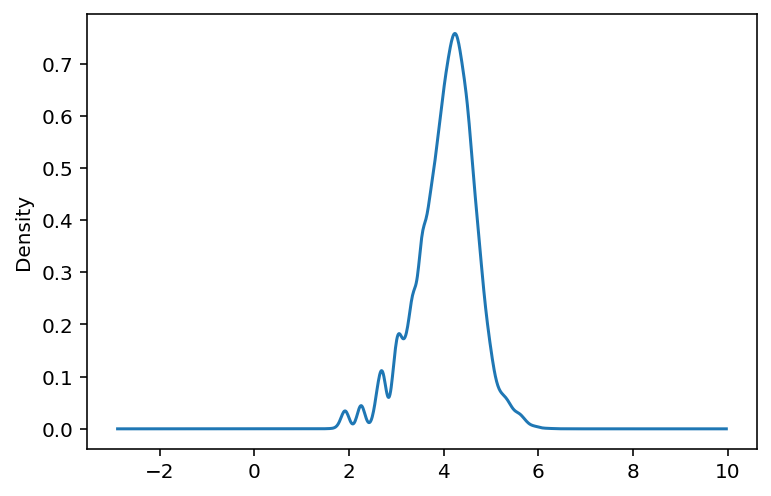

In [43]:
# Distribution of distance traveled in a 6 hour time interval for all hurricanes
dist = df[df['distance'] > 0]
dist = np.log(dist['distance'])
ser = pd.Series(dist)
ser.plot.kde()

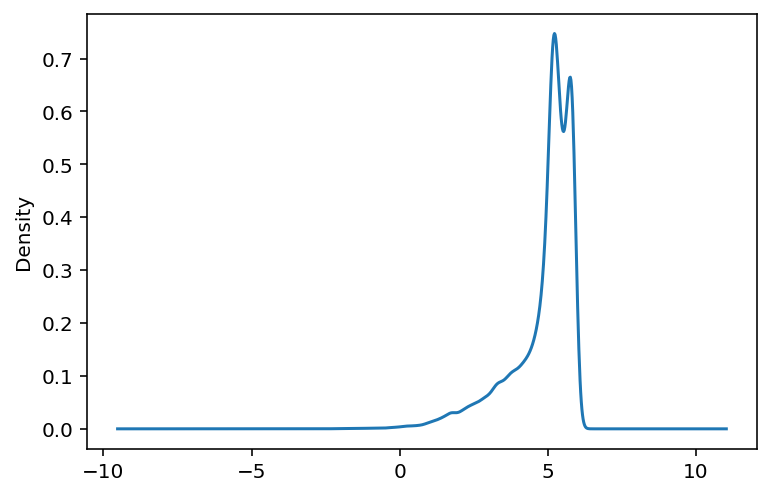

In [44]:
# Distribution of angle traveled in a 6 hour time interval for all hurricanes
direc = df[df['direction'] > 0]
direc = np.log(direc['direction'])
ser = pd.Series(direc)
ser.plot.kde()

In [45]:
# corr = plt.scatter(df['latitude'], df['longitude'])
# plt.grid()
# plt.show()

In [46]:
# Assigning each point to a specific location in the grid. 
# For example, we will learn how a hurricane in quadrant 2 with move.
df['gridID'] = np.zeros(len(df.index))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
dftest['gridID'] = np.zeros(len(dftest.index))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
# These variable are hyperparameters
lat_interval = 20
long_interval = 40

df['gridID'] = (df['latitude'] + 61.3) / lat_interval + ( (df['longitude'] + 179.9) * 6) / long_interval
df['gridID'] = round(df['gridID'])
    
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,stormid,instant_t,latitude,longitude,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,...,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10,distance,direction,gridID
18,1979077N07150,9,12.2,137.8,35.0,1,2.989996e-22,0.0,35.0,2,...,0.000022,-0.000008,-0.000019,-0.000020,-0.000023,-0.000023,-0.000019,69.960854,263.476256,51.0
19,1979077N07150,10,12.8,136.7,40.0,1,2.989996e-22,0.0,5.0,2,...,0.000010,-0.000005,-0.000020,-0.000025,-0.000024,-0.000024,-0.000022,84.996212,297.448103,51.0
20,1979077N07150,11,13.2,135.8,45.0,1,2.989996e-22,0.0,10.0,2,...,0.000003,-0.000002,-0.000014,-0.000025,-0.000027,-0.000024,-0.000024,66.595707,259.122041,51.0
21,1979077N07150,12,13.6,135.4,55.0,1,2.989996e-22,0.0,15.0,2,...,-0.000019,-0.000013,-0.000014,-0.000014,-0.000024,-0.000029,-0.000026,38.556737,196.485194,51.0
22,1979077N07150,13,14.1,135.0,60.0,1,2.989996e-22,0.0,15.0,2,...,-0.000015,-0.000013,-0.000018,-0.000027,-0.000031,-0.000033,-0.000031,43.743848,180.830329,51.0


In [49]:
# These variable are hyperparameters
lat_interval = 20
long_interval = 40

dftest['gridID'] = (dftest['latitude'] + 57) / lat_interval + ( (dftest['longitude'] + 179.9) * 6) / long_interval
dftest['gridID'] = round(dftest['gridID'])
    
dftest.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,stormid,instant_t,latitude,longitude,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,...,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10,distance,direction,gridID
1,1979066S15124,1,-15.1,123.0,25.0,0,1.596617e-21,25.0,0.0,6,...,-0.000014,-0.000023,-0.000027,-0.000025,-0.000020,-0.000018,-0.000011,60.419181,67.028088,48.0
2,1979066S15124,2,-14.7,122.3,25.0,0,1.596617e-21,25.0,0.0,6,...,-0.000040,-0.000018,-0.000010,-0.000020,-0.000031,-0.000021,-0.000011,54.298810,20.592665,47.0
3,1979066S15124,3,-14.3,122.0,25.0,0,1.596617e-21,25.0,0.0,6,...,-0.000018,-0.000024,-0.000013,-0.000006,-0.000007,-0.000018,-0.000016,34.154624,2.940917,47.0
4,1979066S15124,4,-13.8,121.7,25.0,0,1.596617e-21,25.0,0.0,6,...,-0.000002,-0.000010,-0.000021,-0.000020,-0.000008,-0.000010,-0.000011,39.972504,346.614445,47.0
5,1979066S15124,5,-13.5,121.2,30.0,0,1.596617e-21,25.0,5.0,6,...,0.000004,0.000003,0.000011,0.000008,-0.000007,-0.000023,-0.000021,39.454488,222.782582,47.0


In [50]:
# df.to_csv('checkpoint-dataframe.csv') # Save the dataframe to csv for checkpoint

In [51]:
# dftest.to_csv('test-dataframe.csv')

# Build the Model

In [52]:
# Load the preprocessed data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df = pd.read_csv('checkpoint-dataframe.csv', index_col=0) 
# dftest = pd.read_csv('test-dataframe.csv', index_col = 0)

In [53]:
df.head() # Check loaded data

,stormid,instant_t,latitude,longitude,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,...,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10,distance,direction,gridID
18,1979077N07150,9,12.2,137.8,35.0,1,2.989996e-22,0.0,35.0,2,...,0.000022,-0.000008,-0.000019,-0.000020,-0.000023,-0.000023,-0.000019,69.960854,263.476256,51.0
19,1979077N07150,10,12.8,136.7,40.0,1,2.989996e-22,0.0,5.0,2,...,0.000010,-0.000005,-0.000020,-0.000025,-0.000024,-0.000024,-0.000022,84.996212,297.448103,51.0
20,1979077N07150,11,13.2,135.8,45.0,1,2.989996e-22,0.0,10.0,2,...,0.000003,-0.000002,-0.000014,-0.000025,-0.000027,-0.000024,-0.000024,66.595707,259.122041,51.0
21,1979077N07150,12,13.6,135.4,55.0,1,2.989996e-22,0.0,15.0,2,...,-0.000019,-0.000013,-0.000014,-0.000014,-0.000024,-0.000029,-0.000026,38.556737,196.485194,51.0
22,1979077N07150,13,14.1,135.0,60.0,1,2.989996e-22,0.0,15.0,2,...,-0.000015,-0.000013,-0.000018,-0.000027,-0.000031,-0.000033,-0.000031,43.743848,180.830329,51.0


In [54]:
dftest.head()

,stormid,instant_t,latitude,longitude,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,...,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10,distance,direction,gridID
1,1979066S15124,1,-15.1,123.0,25.0,0,1.596617e-21,25.0,0.0,6,...,-0.000014,-0.000023,-0.000027,-0.000025,-0.000020,-0.000018,-0.000011,60.419181,67.028088,48.0
2,1979066S15124,2,-14.7,122.3,25.0,0,1.596617e-21,25.0,0.0,6,...,-0.000040,-0.000018,-0.000010,-0.000020,-0.000031,-0.000021,-0.000011,54.298810,20.592665,47.0
3,1979066S15124,3,-14.3,122.0,25.0,0,1.596617e-21,25.0,0.0,6,...,-0.000018,-0.000024,-0.000013,-0.000006,-0.000007,-0.000018,-0.000016,34.154624,2.940917,47.0
4,1979066S15124,4,-13.8,121.7,25.0,0,1.596617e-21,25.0,0.0,6,...,-0.000002,-0.000010,-0.000021,-0.000020,-0.000008,-0.000010,-0.000011,39.972504,346.614445,47.0
5,1979066S15124,5,-13.5,121.2,30.0,0,1.596617e-21,25.0,5.0,6,...,0.000004,0.000003,0.000011,0.000008,-0.000007,-0.000023,-0.000021,39.454488,222.782582,47.0


In [55]:
# import numpy as np
# np.where(df['direction'] == 0)

In [56]:
# df.drop(['latitude', 'longitude', 'stormid'], axis = 1, inplace = True)
# df.drop(['latitude', 'longitude'], axis = 1, inplace = True)

df_ = df.drop(['latitude', 'longitude'], axis = 1)



temp_df = df_

temp_df = temp_df[temp_df['distance'] > 0]
temp_df['distance'] = np.log(temp_df['distance'])

temp_df = temp_df[temp_df['direction'] > 0]
temp_df['direction'] = np.log(temp_df['direction'])

temp_df.head()

,stormid,instant_t,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,nature,dist2land,...,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10,distance,direction,gridID
18,1979077N07150,9,35.0,1,2.989996e-22,0.0,35.0,2,0,1311,...,0.000022,-0.000008,-0.000019,-0.000020,-0.000023,-0.000023,-0.000019,4.247936,5.573963,51.0
19,1979077N07150,10,40.0,1,2.989996e-22,0.0,5.0,2,0,1203,...,0.000010,-0.000005,-0.000020,-0.000025,-0.000024,-0.000024,-0.000022,4.442607,5.695240,51.0
20,1979077N07150,11,45.0,1,2.989996e-22,0.0,10.0,2,0,1115,...,0.000003,-0.000002,-0.000014,-0.000025,-0.000027,-0.000024,-0.000024,4.198640,5.557299,51.0
21,1979077N07150,12,55.0,1,2.989996e-22,0.0,15.0,2,0,1083,...,-0.000019,-0.000013,-0.000014,-0.000014,-0.000024,-0.000029,-0.000026,3.652131,5.280587,51.0
22,1979077N07150,13,60.0,1,2.989996e-22,0.0,15.0,2,0,1050,...,-0.000015,-0.000013,-0.000018,-0.000027,-0.000031,-0.000033,-0.000031,3.778351,5.197559,51.0


In [57]:
# dftest.drop(['latitude', 'longitude', 'stormid'], axis = 1, inplace = True)
# dftest.drop(['latitude', 'longitude'], axis = 1, inplace = True)

dftest_ = dftest.drop(['latitude', 'longitude'], axis = 1)


temp_df1 = dftest_

temp_df1 = temp_df1[temp_df1['distance'] > 0]
temp_df1['distance'] = np.log(temp_df1['distance'])

temp_df1 = temp_df1[temp_df1['direction'] > 0]
temp_df1['direction'] = np.log(temp_df1['direction'])

temp_df1.head()

,stormid,instant_t,windspeed,hemisphere,Jday_predictor,initial_max_wind,max_wind_change_12h,basin,nature,dist2land,...,vo700_10_4,vo700_10_5,vo700_10_6,vo700_10_7,vo700_10_8,vo700_10_9,vo700_10_10,distance,direction,gridID
1,1979066S15124,1,25.0,0,1.596617e-21,25.0,0.0,6,5,144,...,-0.000014,-0.000023,-0.000027,-0.000025,-0.000020,-0.000018,-0.000011,4.101307,4.205112,48.0
2,1979066S15124,2,25.0,0,1.596617e-21,25.0,0.0,6,5,211,...,-0.000040,-0.000018,-0.000010,-0.000020,-0.000031,-0.000021,-0.000011,3.994502,3.024935,47.0
3,1979066S15124,3,25.0,0,1.596617e-21,25.0,0.0,6,5,264,...,-0.000018,-0.000024,-0.000013,-0.000006,-0.000007,-0.000018,-0.000016,3.530898,1.078722,47.0
4,1979066S15124,4,25.0,0,1.596617e-21,25.0,0.0,6,5,328,...,-0.000002,-0.000010,-0.000021,-0.000020,-0.000008,-0.000010,-0.000011,3.688192,5.848213,47.0
5,1979066S15124,5,30.0,0,1.596617e-21,25.0,5.0,6,5,366,...,0.000004,0.000003,0.000011,0.000008,-0.000007,-0.000023,-0.000021,3.675148,5.406196,47.0


In [58]:
max(temp_df['gridID']) # Total grid spots

59.0

In [59]:
# import numpy as np
# np.where(np.isnan(temp_df))

In [60]:
max(temp_df1['gridID']) # Total grid spots

58.0

In [61]:
storm_id = temp_df['stormid'].to_list()

storm_id_test = temp_df1['stormid'].to_list()

temp_df.drop(['stormid'],axis = 1, inplace = True)

temp_df1.drop(['stormid'],axis = 1, inplace = True)

data2 = temp_df
test2 = temp_df1

data = temp_df.to_numpy()

test = temp_df1.to_numpy()


lat, long = data[:,-3], data[:,-2]
data = data[:,:-3]

#lat - distance, long - direction

lat_test, long_test = test[:,-3], test[:,-2]
test = test[:,:-3]

# we are not using gridID for training data

In [62]:
# import numpy as np
# np.where(np.isnan(data))


# data2['distance'] == lat
# data2['direction'] == long

In [63]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# Normalize the values to predict them more easily in our model
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler1, scaler2, scaler3 = StandardScaler(), StandardScaler(), StandardScaler()

data = scaler1.fit_transform(data)
# test = scaler1.transform(test)
test = scaler1.fit_transform(test)


lat = np.reshape(scaler2.fit_transform(np.reshape(lat, (len(lat), 1))), (len(lat)))
long = np.reshape(scaler3.fit_transform(np.reshape(long, (len(long), 1))), (len(long)))


lat_test = np.reshape(scaler2.transform(np.reshape(lat_test, (len(lat_test), 1))), (len(lat_test)))
long_test = np.reshape(scaler3.transform(np.reshape(long_test, (len(long_test), 1))), (len(long_test)))

In [64]:
# np.where(np.isnan(data))
# # print(data[45,416])


# # fill NaN with 0
# data = np.nan_to_num(data)

# # fill NaN with 0 in TEST as well
# test = np.nan_to_num(test)


In [65]:
# from sklearn.model_selection import train_test_split

# # 857 :  distance
# # 858 :  direction


# temp_df.describe()
# x_train = temp_df[:, :-1]

# y_train = temp_df[:, -1][:,-1]

# x_test = temp_df1[:,:-1]
# y_test = temp_df1[:,:-1]

# time_steps = 6




X, Y, total_ts, time_steps, y, curr_id = list(), list(), 6, list(), list(), ""

X_test, Y_test, total_ts_test, time_steps_test, y_test, curr_id_test = list(),list(),6,list(),list(),""



def slicer(data, lat, long,total_ts,time_steps):
    time_steps, x, y = list(), list(), list()
    for i in range(0, len(data), total_ts):
        time_steps.extend(data[i:i+total_ts])
        if len(time_steps) == total_ts:
            # The situation when number of time steps is exactly equal to current data length
            if i+total_ts >= len(data):
                padding = np.zeros((total_ts + 1 - len(time_steps), len(data[0])), dtype='float32')
                x.append(np.concatenate((padding, time_steps[:-1])))
                y.append([lat[-1], long[-1]])
            else:
                x.append(time_steps)
                y.append([lat[i+total_ts], long[i+total_ts]])
                time_steps = list()
        else:
            if len(time_steps) > 1:
                padding = np.zeros((total_ts + 1 - len(time_steps), len(data[0])), dtype='float32')
                x.append(np.concatenate((padding, time_steps[:-1])))
                y.append([lat[-1], long[-1]])
                time_steps = list()
                
    # The situation when some time_steps are left and not yet added
    if len(time_steps) > 1:
        padding = np.zeros((total_ts + 1 - len(time_steps), len(data[0])), dtype='float32')
        x.append(np.concatenate((padding, time_steps[:-1])))
        y.append([lat[-1], long[-1]])
        time_steps = list()
        
    return x, y

curr_id, small_data, small_lat, small_long = storm_id[0], list(), list(), list()
for index in range(data.shape[0]):
    if curr_id!= storm_id[index]:
        x, y = slicer(small_data, small_lat, small_long,total_ts,time_steps)
        X.extend(x), Y.extend(y)
        small_data = [data[index]]
        small_lat = [lat[index]]
        small_long = [long[index]]
        curr_id = storm_id[index]
    else:
        small_data.append(data[index])
        small_lat.append(lat[index])
        small_long.append(long[index])

X = np.array(X, dtype='float32')
Y = np.array(Y, dtype='float32')

print(X.shape, Y.shape)

curr_id_test,small_data_test,small_lat_test,small_long_test = storm_id_test[0],list(),list(),list()
for index in range(test.shape[0]):
    if curr_id_test != storm_id_test[index]:
        x_test,y_test = slicer(small_data_test, small_lat_test,small_long_test,total_ts_test,time_steps_test)
        X_test.extend(x_test), Y_test.extend(y_test)
        small_data_test = [test[index]]
        small_lat_test = [lat_test[index]]
        small_long_test = [long_test[index]]
        curr_id_test = storm_id_test[index]
    else:
        small_data_test.append(test[index])
        small_lat_test.append(lat_test[index])
        small_long_test.append(long_test[index])
X_test = np.array(X_test, dtype = 'float32')
Y_test = np.array(Y_test, dtype = 'float32')

print(X_test.shape, Y_test.shape)



(6193, 6, 856) (6193, 2)
(3140, 6, 856) (3140, 2)


In [66]:
storm_id[0]

'1979077N07150'

In [67]:
storm_id_test[0] # == storm_id[0]

'1979066S15124'

In [68]:
import tensorflow as tf
from keras.layers import Conv1D, LSTM, GlobalMaxPooling1D, Dense, Input, BatchNormalization, Activation
from keras.models import Model


from keras.optimizers import Adam
# from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import time


# X_train, X_tmp, Y_train, Y_tmp = train_test_split(X, Y, test_size=0.4, random_state=8)
# X_val, X_test, Y_val, Y_test = train_test_split(X_tmp, Y_tmp, test_size=0.5, random_state=8)


# X_train, X_tmp, Y_train, Y_tmp = train_test_split(X, Y, test_size=0.4, random_state=8)
# X_val, X_test, Y_val, Y_test = train_test_split(X_tmp, Y_tmp, test_size=0.5, random_state=8)

# X_train = X
# Y_train = Y

X_train,X_val,Y_train,Y_val = train_test_split(X,Y,random_state=8)


scaler = StandardScaler()



shape = X_train.shape
X_train = np.reshape(X_train, (shape[0], shape[1]*shape[2]))
X_train = scaler.fit_transform(X_train)
X_train = np.reshape(X_train, shape)

shape = X_val.shape
X_val = np.reshape(X_val, (shape[0], shape[1]*shape[2]))
X_val = scaler.transform(X_val)
X_val = np.reshape(X_val, shape)

shape = X_test.shape
X_test = np.reshape(X_test, (shape[0], shape[1]*shape[2]))
X_test = scaler.transform(X_test)
X_test = np.reshape(X_test, shape)

inp = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv_out = Conv1D(512, 2, strides=1)(inp)
#x1 = BatchNormalization()(x1)

x1 = LSTM(200, return_sequences=False)(conv_out)


x2 = LSTM(200, return_sequences=False)(conv_out)




# x1, x2 = BatchNormalization()(x1), BatchNormalization()(x2)

x1 = Dense(64, activation = 'tanh')(x1)

x2 = Dense(128, activation='tanh')(x2)


out1, out2 = Dense(1, name="output1")(x1), Dense(1, name="output2")(x2)

model = Model(inputs=inp, outputs=[out1, out2])

# model.compile(loss='mse', optimizer='adam', metrics=['mse'])
# HUBER LOSS instead of MSE

# losses = {
# 	"lat_output": "mse",
# 	"long_output": "mse",
# }

adam = Adam(lr=0.0001)
# model.compile(loss=tf.keras.losses.Huber(), optimizer=adam, metrics=['mse'])
model.compile(loss=tf.keras.losses.Huber(), optimizer=adam, metrics=['mae'])

# lr = standard
start = time.time()
model.fit(X_train, [Y_train[:,0], Y_train[:,1]], validation_data=(X_val, [Y_val[:,0],Y_val[:,1]]), batch_size=64, epochs=60)
print("Training Time : ", time.time() - start)



# model.fit(X_train, [Y_train_lat, Y_train_long], validation_data=(X_val, Y_val), batch_size=64, epochs=20)
# batch size = 32


Using TensorFlow backend.


Train on 4644 samples, validate on 1549 samples
Epoch 1/60
4644/4644 [==============================] - 7s 2ms/step - loss: 0.7370 - output1_loss: 0.3413 - output2_loss: 0.3946 - output1_mae: 0.6844 - output2_mae: 0.7351 - val_loss: 0.6736 - val_output1_loss: 0.3029 - val_output2_loss: 0.3689 - val_output1_mae: 0.6293 - val_output2_mae: 0.7009
Epoch 2/60
4644/4644 [==============================] - 2s 380us/step - loss: 0.5883 - output1_loss: 0.2480 - output2_loss: 0.3401 - output1_mae: 0.5608 - output2_mae: 0.6631 - val_loss: 0.6399 - val_output1_loss: 0.2756 - val_output2_loss: 0.3618 - val_output1_mae: 0.5989 - val_output2_mae: 0.7023
Epoch 3/60
4644/4644 [==============================] - 2s 367us/step - loss: 0.5187 - output1_loss: 0.2045 - output2_loss: 0.3155 - output1_mae: 0.4952 - output2_mae: 0.6266 - val_loss: 0.6493 - val_output1_loss: 0.2861 - val_output2_loss: 0.3625 - val_output1_mae: 0.6117 - val_output2_mae: 0.7063
Epoch 4/60
4644/4644 [==============================] 

4644/4644 [==============================] - 2s 363us/step - loss: 0.0217 - output1_loss: 0.0059 - output2_loss: 0.0157 - output1_mae: 0.0773 - output2_mae: 0.1227 - val_loss: 0.7458 - val_output1_loss: 0.2900 - val_output2_loss: 0.4561 - val_output1_mae: 0.6052 - val_output2_mae: 0.8224
Epoch 29/60
4644/4644 [==============================] - 2s 370us/step - loss: 0.0211 - output1_loss: 0.0053 - output2_loss: 0.0157 - output1_mae: 0.0741 - output2_mae: 0.1236 - val_loss: 0.7512 - val_output1_loss: 0.2941 - val_output2_loss: 0.4568 - val_output1_mae: 0.6098 - val_output2_mae: 0.8214
Epoch 30/60
4644/4644 [==============================] - 2s 363us/step - loss: 0.0216 - output1_loss: 0.0056 - output2_loss: 0.0159 - output1_mae: 0.0767 - output2_mae: 0.1272 - val_loss: 0.7534 - val_output1_loss: 0.2947 - val_output2_loss: 0.4594 - val_output1_mae: 0.6096 - val_output2_mae: 0.8247
Epoch 31/60
4644/4644 [==============================] - 2s 381us/step - loss: 0.0237 - output1_loss: 0.0078 

4644/4644 [==============================] - 2s 367us/step - loss: 0.0162 - output1_loss: 0.0047 - output2_loss: 0.0114 - output1_mae: 0.0737 - output2_mae: 0.1159 - val_loss: 0.7379 - val_output1_loss: 0.2909 - val_output2_loss: 0.4496 - val_output1_mae: 0.6024 - val_output2_mae: 0.8095
Epoch 56/60
4644/4644 [==============================] - 2s 370us/step - loss: 0.0179 - output1_loss: 0.0064 - output2_loss: 0.0115 - output1_mae: 0.0817 - output2_mae: 0.1161 - val_loss: 0.7345 - val_output1_loss: 0.2895 - val_output2_loss: 0.4490 - val_output1_mae: 0.5999 - val_output2_mae: 0.8097
Epoch 57/60
4644/4644 [==============================] - 2s 367us/step - loss: 0.0185 - output1_loss: 0.0076 - output2_loss: 0.0109 - output1_mae: 0.0938 - output2_mae: 0.1146 - val_loss: 0.7294 - val_output1_loss: 0.2843 - val_output2_loss: 0.4432 - val_output1_mae: 0.5993 - val_output2_mae: 0.8063
Epoch 58/60
4644/4644 [==============================] - 2s 363us/step - loss: 0.0158 - output1_loss: 0.0064 

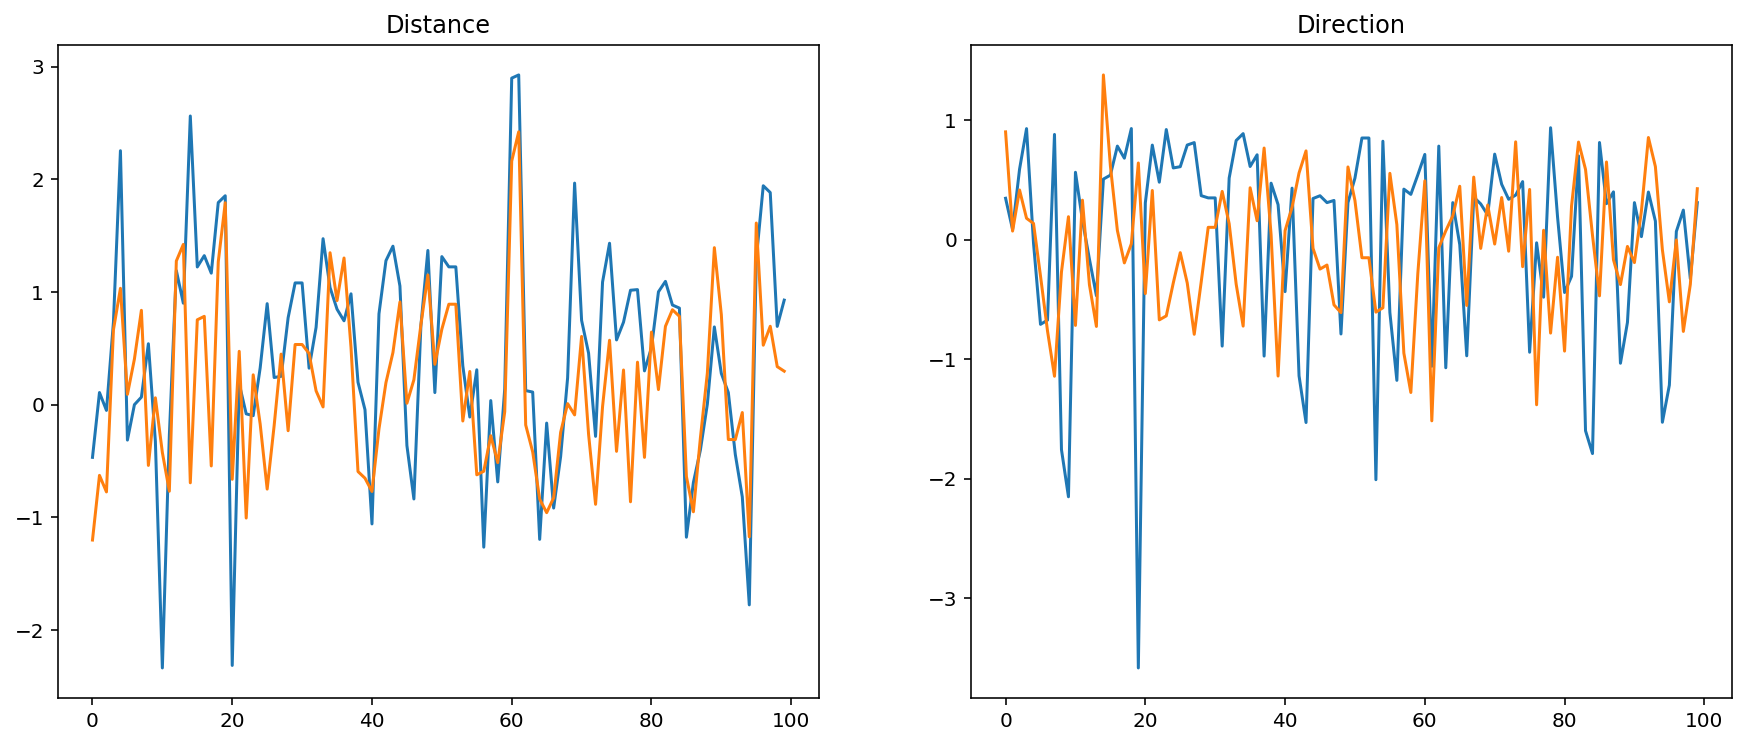

(3140, 2) (3140, 2)
Latitude (MSE):  0.2725650769115571
Longitude(MSE):  1.5561399885638219
Latitude (RMSE):  0.5220776541009556
Longitude(RMSE):  1.2474534013596748
Latitude (MAE):  0.3936412574011682
Longitude(MAE):  0.936252772056161


In [69]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

preds = np.array(model.predict(X_test))
new_preds = np.zeros((preds.shape[1], 2))
new_preds[:, 0] = np.reshape(preds[0], (preds.shape[1]))
new_preds[:, 1] = np.reshape(preds[1], (preds.shape[1]))
preds = new_preds
del new_preds
#Y_test = np.reshape(Y_test, (Y_test.shape[0], 2))
#preds = np.reshape(preds, (preds.shape[0], 2))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
num_points = 100
ax[0].plot(np.arange(num_points), Y_test[:num_points,0])
ax[0].plot(np.arange(num_points), preds[:num_points,0])
ax[0].title.set_text("Distance")

ax[1].plot(np.arange(num_points), Y_test[:num_points,1])
ax[1].plot(np.arange(num_points), preds[:num_points,1])
ax[1].title.set_text("Direction")

fig1 = plt.gcf()
plt.show()
fig1.savefig('result.png', dpi = 600)

print(preds.shape, Y_test.shape)
a, b = np.reshape(scaler2.inverse_transform(Y_test[:,:1]), (len(Y_test))), np.reshape(scaler2.inverse_transform(preds[:,:1]), (len(preds)))
c, d = np.reshape(scaler3.inverse_transform(Y_test[:,1:]), (len(Y_test))), np.reshape(scaler3.inverse_transform(preds[:,1:]), (len(preds)))

print("Latitude (MSE): ", mean_squared_error(a, b))
print("Longitude(MSE): ", mean_squared_error(c, d))

print("Latitude (RMSE): ", np.sqrt(mean_squared_error(a, b)))
print("Longitude(RMSE): ", np.sqrt(mean_squared_error(c, d)))

print("Latitude (MAE): ", mean_absolute_error(a, b))
print("Longitude(MAE): ", mean_absolute_error(c, d))


In [70]:
X_train.shape

(4644, 6, 856)

In [71]:
# # data.shape
# # test.shape
# # class_names = []
# # class_names.append(x for x in features)
# # features


# data = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

data.shape[1]

856

In [72]:
# data.drop(['stormid'],axis = 1, inplace = True)
# test.drop(['stormid'],axis = 1, inplace = True)

# data = data.to_numpy()
# test = test.to_numpy()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 6, 856)       0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 5, 512)       877056      input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 200)          570400      conv1d_1[0][0]                   
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 200)          570400      conv1d_1[0][0]                   
____________________________________________________________________________________________

# Explain

In [ ]:
# !tf.keras.backend.clear_session()


import deeplift
from deeplift.conversion import kerasapi_conversion as kc


import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

model.save('model_5.h5')


import h5py
import json

print("keras version", m.attrs['keras_version'])


deeplift_model = kc.convert_model_from_saved_files("D:\ml\cycloneTrack\model_5.h5", nonlinear_mxts_mode=deeplift.layers.NonlinearMxtsMode.GuidedBackprop)

# deeplift_contribs_func = deeplift_model.get_target_contribs_func(find_scores_layer_idx=find_scores_layer_idx,target_layer_idx=-1)

# for sequential():

# find_scores_layer_idx = 0

# deeplift_contrib_func = deeplift_model.get_target_contribs_func(find_scores_layer_idx = find_scores_layer_idx, target_layer_idx = 1)

# scores = np.array(deeplift_contribs_func(task_id = 0, input_data_list = [X], batch_size = 10, progress_update = 1000))

# for functional

deeplift_contribs_func = deeplift_model.get_target_contribs_func(find_scores_layer_name = "Conv1D", pre_activation_target_layer_name = "InputLayer")

# scores = np.array(deeplift_contribs_func)

In [ ]:
# import deeplift as dl
# from deeplift.conversion import kerasapi_conversion as kc

# from deepexplain.tensorflow import DeepExplain


import deepexplain as de

from keras import backend as K

import tensorflow as tf

s = tf.compat.v1.keras.backend.get_session()

with de.tensorflow.DeepExplain(session = s) as de:
    input_tensor = model.inputs
    fModel = Model(inputs = input_tensors, outputs = model.outputs)
    target_tensor = fModel(input_tensors)
            
            

In [ ]:
import lime
import lime.lime_tabular

import warnings
# from lime import submodular_pick
from lime.lime_tabular import RecurrentTabularExplainer


i = 859


categorical_features = []

categorical_names = ['hemisphere', 'basin', 'nature']



# categorical_features  = np.argwhere(np.array([len(set(X_train[:,x])) for x in range(data.shape[1])]) <= 10).flatten()
explainer = lime.lime_tabular.RecurrentTabularExplainer(X_train, feature_names=features, class_names=['distance','direction'], verbose=False, mode='regression',discretize_continuous=False)

# explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=features, class_names=['distance','direction'], verbose=False, mode='regression',discretize_continuous=False)


In [ ]:
# explainer
model.run_internal_graph(model, X_train)

In [ ]:
e = explainer.explain_instance(X_test[0], model, num_features=856)

# Y_train.shape

In [ ]:
import pandas as pd


def convert_to_lime_format(X, categorical_names, col_names=None, invert=False):
    """Converts data with categorical values as string into the right format 
    for LIME, with categorical values as integers labels.
    It takes categorical_names, the same dictionary that has to be passed
    to LIME to ensure consistency. 
    col_names and invert allow to rebuild the original dataFrame from
    a numpy array in LIME format to be passed to a Pipeline or sklearn
    OneHotEncoder
    """

    # If the data isn't a dataframe, we need to be able to build it
    if not isinstance(X, pd.DataFrame):
        X_lime = pd.DataFrame(X, columns=col_names)
    else:
        X_lime = X.copy()

    for k, v in categorical_names.items():
        if not invert:
            label_map = {
                str_label: int_label for int_label, str_label in enumerate(v)
            }
        else:
            label_map = {
                int_label: str_label for int_label, str_label in enumerate(v)
            }

        X_lime.iloc[:, k] = X_lime.iloc[:, k].map(label_map)

    return X_lime




explainer = RecurrentTabularExplainer(convert_to_lime_format(data2, categorical_names).values,
                                 mode="regression",
                                 feature_names=X_train.columns.tolist(),
                                 discretize_continuous=True,
                                 random_state=42)



In [ ]:
import shap
shap.initjs()

from shap import SamplingExplainer

from shap.explainers import mimic # mimicExplainer : https://github.com/slundberg/shap/blob/master/shap/explainers/mimic.py

data2 = temp_df
test2 = temp_df1


i = 850

# background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# e = shap.TreeExplainer(model, background)
# e = shap.MimicExplainer(model)

e = mimic.MimicExplainer(model, data2)

shap_values = e.shap_values(test2)

shap.force_plot(e.expected_value, shap_values[i], features=X_train.loc[i], feature_names=X_train.columns)

In [ ]:
temp_df1.describe()